In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs

In [2]:
exp_path = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel18-prod-openmp/pp/"
file_path = "atmos/ts/6hr/5yr/atmos.0101"
fpath_slp = exp_path+file_path+"*.slp.nc"
fpath_u = exp_path+file_path+"*.u_ref.nc"
fpath_v = exp_path+file_path+"*.v_ref.nc"

In [3]:
ds_slp = xr.open_mfdataset(f"{fpath_slp}", use_cftime=True)
ds_u = xr.open_mfdataset(f"{fpath_u}", use_cftime=True)
ds_v = xr.open_mfdataset(f"{fpath_v}", use_cftime=True)

In [4]:
slp_SO = ds_slp.slp.sel({"lon":270, "lat":-60}, method="nearest")*1e-2
u_SO = ds_u.u_ref.sel({"lon":270, "lat":-60}, method="nearest")
v_SO = ds_v.v_ref.sel({"lon":270, "lat":-60}, method="nearest")
uv_SO = (u_SO**2+v_SO**2)**0.5

In [5]:
# Setting up a threshold for when we find a storm -- first cut using SLP distribution
slp_threshold = slp_SO.mean(dim="time") - 2*slp_SO.std(dim="time")

In [6]:
slp_threshold = slp_threshold.load().data
slp_threshold

array(955.2211, dtype=float32)

Here I'll pick out a specific time where the SLP threshold is crossed
This modelled system happened in August and lasted for --12 hours??

In [7]:
time_low = ds_slp.time.where(slp_SO <= slp_threshold)
time_low_idx = np.nonzero(time_low.notnull().load().data)
time_low_idx

(array([ 146,  299,  426,  427,  428,  429,  430,  431,  432,  433,  614,
         861,  862,  961,  971,  972,  973, 1003, 1004, 1005, 1169, 1351,
        1353, 1806, 1807, 1853, 1855, 1856, 1978, 1979, 1980, 2006, 2319,
        2320, 2321, 2322, 2347, 2348, 2349, 2362, 2363, 2364, 2365, 2366,
        3687, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3770, 4038,
        4100, 4101, 4112, 4121, 4122, 4123, 4124, 4426, 4427, 4781, 4782,
        4806, 5166, 5167, 5168, 5169, 5170, 6076, 6080, 6093, 6431, 6432,
        6433, 6541, 6542, 6543, 6544, 6545, 6546, 6547, 6548, 6549, 6623,
        6632, 6634, 6659, 6725, 6885, 6886, 6910, 7067, 7068, 7069, 7163,
        7164, 7165, 7166, 7167, 7168]),)

In [25]:
time_low = time_low.dropna(dim="time").load()
test_idx = ds_slp.time[426-16:434+16] #give 4 days before and after for response?
test_idx

<xarray.DataArray 'time' (time: 40)>
array([cftime.DatetimeNoLeap(101, 4, 13, 18, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 14, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 14, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 14, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 14, 18, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 15, 18, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 16, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 16, 18, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 17, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 17, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 17, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 17, 18, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 18, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 18, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 18, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 18, 18, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 19, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 19, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 19, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 19, 18, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 20, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 20, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 20, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 20, 18, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 21, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 21, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 21, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 21, 18, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 22, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 22, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 22, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 22, 18, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 23, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 23, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(101, 4, 23, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0101-04-13 18:00:00 ... 0101-04-23 12:00:00
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  NOLEAP

In [26]:
test_slp = ds_slp.slp.sel({"time":test_idx.data}, method="nearest")
test_u = ds_u.u_ref.sel({"time":test_idx.data}, method="nearest")
test_v = ds_v.v_ref.sel({"time":test_idx.data}, method="nearest")
test_windspd = np.sqrt(test_u.data**2 + test_v.data**2)

# We see a low-pressure system 
that propagates southward over the course of around 36 hours. Maximum windspeeds reach over 25 m/s

In [ ]:
for i in np.arange(len(test_idx)):
    plt.subplots()
    contours = (test_slp[i,:,:]*1e-2).plot.contour(
        ylim=[-80, -40], 
        xlim=[200, 300],
        colors='w')
    plt.pcolormesh(ds_slp.lon, ds_slp.lat, test_windspd[i,:,:], vmin=0, vmax=30)
    plt.colorbar()
    plt.clabel(contours, inline=True,fontsize=8)
    plt.scatter(270,-60, c='r', marker='x')
    plt.savefig(f"storm_snap{i}.png", format="png", dpi=200)

# Now we want to look a bit at what the ocean does during these storms

omldamax is the surface boundary layer depth (defined how?)


In [16]:
path_ocean = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_daily_1x1deg/ts/daily/5yr/"
path_ml = "ocean_daily_1x1deg.0101*mlotst.nc"

ds_ocean = xr.open_mfdataset(f"{path_ocean}{path_ml}", use_cftime=True)
#ds_ocean.mlotst

In [27]:
mld_SO = ds_ocean.mlotst.sel({"lon":270, "lat":-60, "time":test_idx}, method="nearest")

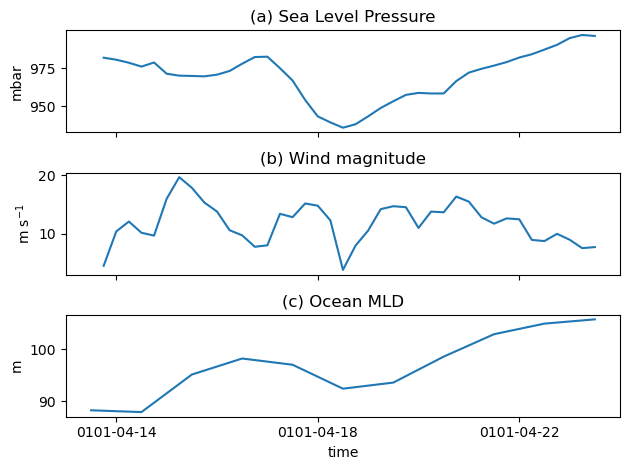

In [33]:
fig, axs = plt.subplots(ncols=1, nrows=3, sharex=True)
axs.flatten()
slp_SO.sel({"time":test_idx.data},method="nearest").plot(ax=axs[0])
axs[0].set_title("(a) Sea Level Pressure")
axs[0].set_ylabel("mbar")
axs[0].set_xlabel("")

axs[1].plot(test_idx, uv_SO[426-16:434+16])
axs[1].set_title("(b) Wind magnitude")
axs[1].set_ylabel("m s$^{-1}$")

mld_SO.plot(ax=axs[2])
axs[2].set_title("(c) Ocean MLD")
axs[2].set_ylabel("m")
axs[2].set_xlabel("time")

plt.tight_layout()
plt.savefig("storm_ts.png", format="png", dpi=200)

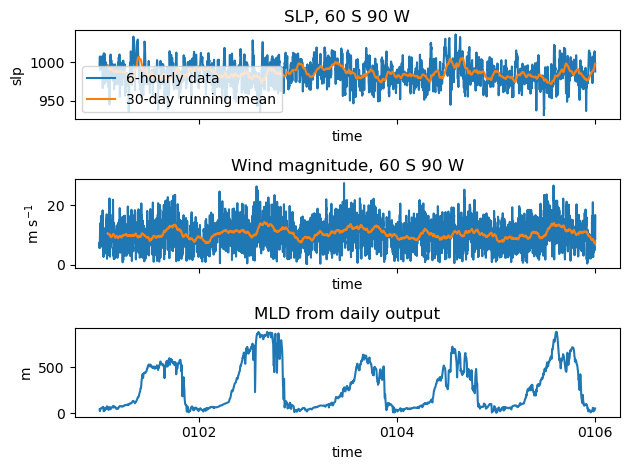

In [32]:
fig, axs = plt.subplots(3,1, sharex=True)
axs.flatten() 

slp_SO.plot(ax=axs[0], label='6-hourly data')
slp_SO.rolling(time=120).mean().plot(ax=axs[0], label='30-day running mean')
axs[0].set_title("SLP, 60 S 90 W")
axs[0].legend()

uv_SO.plot(ax=axs[1])
uv_SO.rolling(time=120).mean().plot(ax=axs[1])
axs[1].set_title("Wind magnitude, 60 S 90 W")
axs[1].set_ylabel('m s$^{-1}$')

ds_ocean.mlotst.sel({"lon":270, "lat":-60}, method="nearest").plot(ax=axs[2])
axs[2].set_title("MLD from daily output")
axs[2].set_ylabel("m")

fig.tight_layout()
plt.savefig("timeseries_atm_mld.png", format="png", dpi=200)

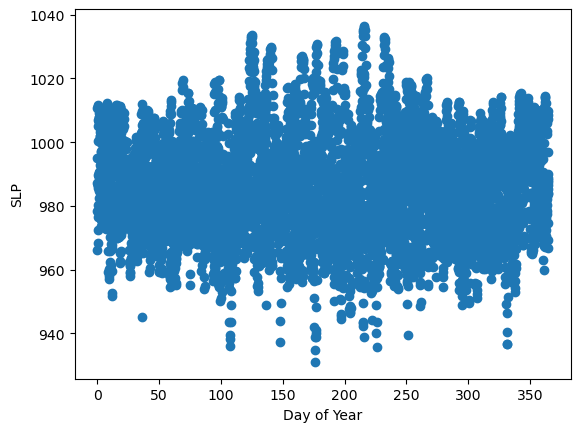

In [42]:
plt.scatter(np.mod(np.arange(0,365*5,0.25),365), slp_SO.data)
plt.xlabel('Day of Year')
plt.ylabel("SLP")
plt.savefig("ann_slp.png", format="png", dpi=200)

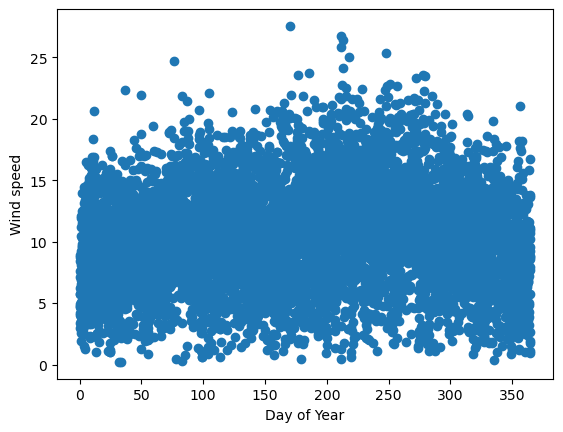

In [43]:
plt.scatter(np.mod(np.arange(0,365*5,0.25),365), uv_SO)
plt.xlabel("Day of Year")
plt.ylabel("Wind speed")
plt.savefig("ann_windspeed.png", format="png", dpi=200)